<a href="https://colab.research.google.com/github/danplotkin/neural_network_numpy/blob/main/NeuralNetworkNumPy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

The concept of neural networks is inspired by the study of how our brain learns new information. Researchers in the field of cognitive science have learned that through a mechanism called neural plasticity, the brain can learn and adapt to new information. In the 1940s and 1950s, researchers in artificial intelligence started developing mathematical models designed to mimic the behavior of neurons and the way they process information during neural plasticity. These models are known as Artificial Neural Networks (ANN).

In this project, I will demonstrate learn how to build a basic neural network from scratch without using any deep learning libraries such as Keras and PyTorch. The purpose of this demonstration is to give a better understanding of the mechanics and computations that go into building a neural network. I will be using an object-oriented approach. The dataset I will be training the network on is the MNIST hand-written digit dataset that comes with Google Colab.

# Architecture of an Artifical Neural Network

As mentioned above, an ANN is a type of machine learning algorithm that is modeled after the structure and function of the human brain. The architecture of an ANN typically consists of three main layers:

* **Input Layer:** The input layer receives the input data and passes it on to the next layer. The number of neurons in the input layer corresponds to the number of features in the input data.

* **Hidden Layers:** The hidden layers process the input data and perform computations on it. The number of hidden layers and the number of neurons in each layer can vary depending on the complexity of the problem. In general, the more hidden layers and neurons, the more powerful the network will be in capturing complex patterns in the data.

* **Output Layer:** The output layer produces the final output of the network. The number of neurons in the output layer corresponds to the number of output classes or output values.

Every neuron in one layer is connected to the neurons in the next layer. They are connected through a weight value. The weight values can be represented as a matrix that will be multiplied by the neurons at the beginning of the link, which can also be represented as a matrix, to get the raw outputs of that link. This is modeled using the dot product. Below is an image from [Data Science Central](https://www.datasciencecentral.com/the-artificial-neural-networks-handbook-part-1/) showing the architecture of a simple ANN:

<img src="https://www.datasciencecentral.com/wp-content/uploads/2021/10/2808361999.jpg" alt="Image Description" width="500" />



# Training Process

When training an ANN, there are two processes ongoing sequantially back and forth:

1) **Forward Propagation**

2) **Backpropagation**

### Forward Propagation

Forward Propagation is the process of moving from left (input layer) to right (output layer) of an ANN. This is the initial step in the training of an ANN, where the input data is fed through the input layer, passes through any hidden layers, and eventually reaches the output layer.

During the Forward Propagation phase, the input data is multiplied by the weights of the connections between the neurons in each layer. This is done using a dot product which gives us a weighted sum. Then, the bias value of the neuron is added to this sum. The resulting value is then passed through an **activation function**, such as the sigmoid function, the rectified linear unit (ReLU), and the hyperbolic tangent (tanh) function, which helps to introduce non-linearity into the network. We will talk more about activation functions in the next section. This is important because it allows the network to detect and learn more complex patterns in the data. Below is an image via [Coding Ninjas](https://www.codingninjas.com/studio/library/understanding-forward-propagation) to visualize the process of Forward Propagation:

![Image](https://raw.githubusercontent.com/danplotkin/neural_network_numpy//main/understanding-forward-propagation-0-1640175094.jpg)

### Backpropagation

Backpropagation is the technique used to adjust the weights and biases of an ANN to reduce the difference between the predicted output and the actual output. This process is essential in training an ANN to perform well.  The core of this method is the application of the **chain rule** of calculus, which allows for efficient computation of gradients. The backpropagation process starts by calculating the error at the output layer. This is done by comparing the predicted output with the actual output. The error is then sent back through the network, one layer at a time. The goal is to adjust the weights and biases in each layer in such a way that the error is minimized. This is done by calculating the gradient of the loss function with respect to the weights and biases of the neurons. The gradient tells us how much each weight and bias should be adjusted to reduce the error. We use an optimization algorithm, such as **Stochastic Gradient Descent (SGD)**, to update the weights and biases of the neurons. By repeating this process over and over again, the network gets better and better at predicting the desired output. Below shows an image via [Towards Data Science](https://towardsdatascience.com/the-maths-behind-back-propagation-cf6714736abf) to visualize this process:

![](https://miro.medium.com/v2/resize:fit:1200/1*XJ7ioX3mFycK5FwsLqVJ8w.png)

Below is the equation for gradient decent, which is used to update the weights and biases using the calculated gradients calculated through backpropagation:

$$w_{ij}^{(l)} = w_{ij}^{(l)} - \alpha \frac{\partial J}{\partial w_{ij}^{(l)}}$$

$$b_j^{(l)} = b_j^{(l)} - \alpha \frac{\partial J}{\partial b_j^{(l)}}
$$

*Note: $\alpha$ is the learning rate, a hyperparameter controlling the speed of gradient descent. It is being multiplied by the gradients of the loss function with respect to the weights and biases.*

Below is a more detailed explanation of backpropagation:

1. **Error Calculation with Chain Rule:** Backpropagation commences by evaluating the error at the output layer. This is achieved through a comparison between the predicted output and the ground truth. The computed error is then propagated backward through the network, layer by layer, employing the chain rule of calculus.

2. **Error Propagation through Layers:** The error is systematically sent back through the network, starting from the output layer and working in reverse. The objective is to adjust the weights and biases in each layer in a way that minimizes the error. At each layer, we calculate the gradient of the loss function with respect to the weights and biases of the neurons.

3. **The Chain Rule in Action:** The chain rule is instrumental in this process. It allows us to compute these gradients by taking into account how each neuron's output depends on its inputs and how each layer's parameters impact the overall network output. Specifically, it involves multiplying the gradient of the loss function with respect to the layer's output (dL/da) by the gradient of the layer's output with respect to its weighted sum (da/dz).

4. **Gradient-Based Weight and Bias Adjustments:** With the gradients computed, we now possess information on how much each weight and bias should be adjusted to minimize the error. This information guides us in tweaking the model's parameters for each neuron. The adjustment process typically utilizes an optimization algorithm, such as Stochastic Gradient Descent (SGD).

5. **Iterative Learning:** This process of forward and backward passes with gradient-based parameter adjustments is performed iteratively for batches of data samples. The goal is to progressively reduce the error until the network's predictions align closely with the desired outputs.

This all may seem very confusing, but the NumPy implemenation should simplify it!

# Activation Functions

We will discuss some of the common activation function used in nerual networks to introduce non-linearity to the network.

### Sigmoid

The sigmoid activation function is an activation function used to introduce non-linearity into a network. It maps the output of a neuron to a range between 0 and 1. Below is the equations for sigmoid and its derivative:

$$ \sigma(x) = \frac{1}{1 + e^{-x}}\ $$

$$ \sigma'(x) = \sigma(x) \cdot (1 - \sigma(x)) $$

Below I will create the NumPy implementation of sigmoid and its derivative. I introduced logit clipping to keep the logits in between the range of -500 and 500 to prevent overflow errors for very large positve values of $x$.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

In [2]:
def sigmoid(x):
    """
    Sigmoid activation function.
    """
    clipped_x = np.clip(x, -500, 500)  # Clip values to prevent overflow
    return 1 / (1 + np.exp(-clipped_x))


def sigmoid_derivative(x):
    """
    Derivative of sigmoid.
    """
    return sigmoid(x) * (1 - sigmoid(x))

Below we will visualize the sigmoid activation function.

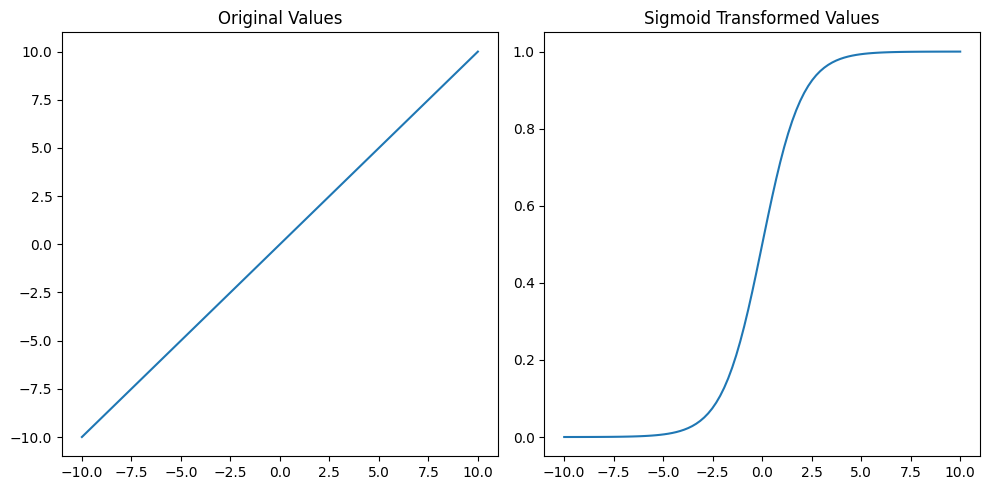

In [3]:
# Generate an array of values ranging from -10 to 10
x = np.linspace(-10, 10, 100)

# Apply the sigmoid function to the array
sigmoid_x = sigmoid(x)

# Plot the original and sigmoid-transformed values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(x, x)
plt.title("Original Values")

plt.subplot(1, 2, 2)
plt.plot(x, sigmoid_x)
plt.title("Sigmoid Transformed Values")

plt.tight_layout()
plt.show()

### Rectified Linear Unit (ReLU)

ReLU is an activation function that outputs $x$ if it is greater than zero. Otherwise, if it is below zero, it will just output zero. This introduces sparse representations wich can reduce redundacy in the learned features. Below are the functions for ReLU and its derivative.


$$\text{ReLU(x)} = \max(x, 0)$$

$$
\frac{d}{dx}\text{ReLU}(x) =
\begin{cases}
1, & \text{if } x > 0 \\
0, & \text{otherwise}
\end{cases}
$$

Below I will show the NumPy implementation of ReLU and its derivative that will be used in backpropagation.

In [4]:
def relu(x):
    """
    ReLU Activation Function
    """
    return np.maximum(x, 0)


def relu_derivative(x):
    """
    ReLU Derivative Function
    """
    return np.where(x > 0, 1, 0)

We will now visualize the ReLU activation and its derivative.

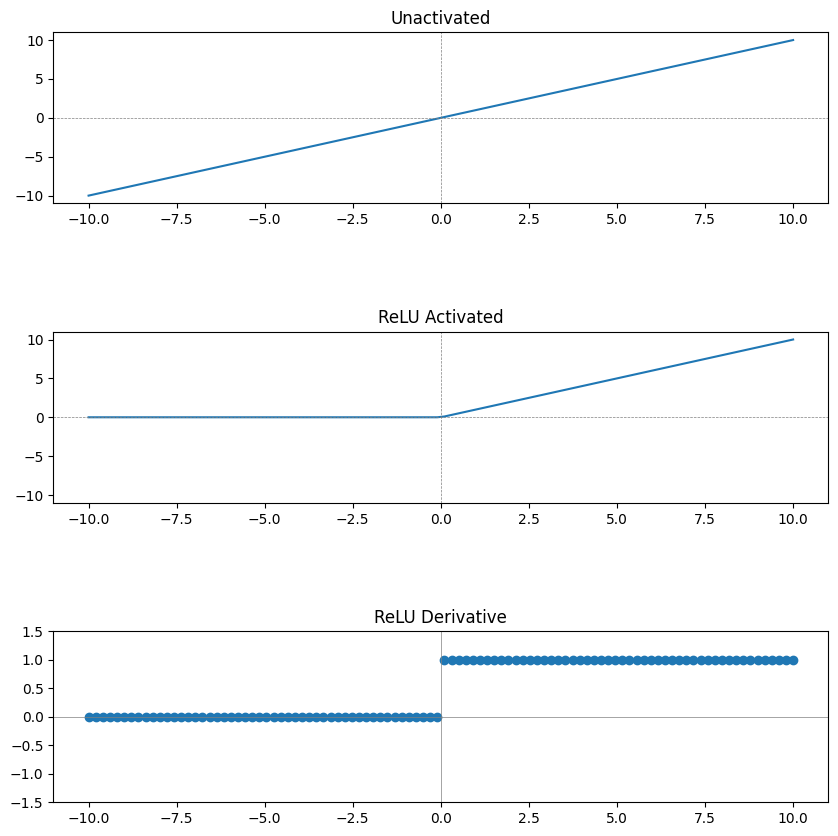

In [5]:
x = np.linspace(-10, 10, 100)

fig, ax = plt.subplots(3, 1, figsize=(10, 10))
fig.subplots_adjust(hspace=0.75)

ax[0].plot(x, x)
ax[0].set_title('Unactivated')


ax[0].set_ylim(x.min()-1, x.max()+1)
ax[0].axhline(0, color='grey', linewidth=0.5, linestyle='--')
ax[0].axvline(0, color='grey', linewidth=0.5, linestyle='--')

ax[1].plot(x, relu(x))
ax[1].set_title('ReLU Activated')

ax[1].set_ylim(x.min()-1, x.max()+1)
ax[1].axhline(0, color='grey', linewidth=0.5, linestyle='--')
ax[1].axvline(0, color='grey', linewidth=0.5, linestyle='--')

ax[2].scatter(x, relu_derivative(x))
ax[2].set_title('ReLU Derivative')

ax[2].set_ylim(-1.5, 1.5)
ax[2].axhline(0, color='grey', linewidth=0.5)
ax[2].axvline(0, color='grey', linewidth=0.5)


plt.show()

### Softmax

The softmax equation is used to transform a vector of real numbers into a probability distribution over multiple classes. This is typically applied to the last layer of a multiclass classification problem. Below is the formula:

$$
\text{Softmax}(x_i) = \frac{e^{x_i}}{\sum_{j=1}^{N} e^{x_j}}
$$

When we implement this in NumPy, we attempt to imporve numerical stability by making ${e^{x_i}}$ the result of subtracting $x$ from the max value among the logits rather than just taking the exponential function of $x$. When dealing with real-world data, these input values can sometimes be very large or very small, which can lead to numerical overflow (extremely large values) or underflow (extremely small values). Overflow can result in computational errors or NaN (Not-a-Number) values, which can disrupt the training of a neural network.

In [6]:
def softmax(x):
    """
    Softmax Activation Function
    """
    max_x = np.max(x, axis=-1, keepdims=True)
    exp_x = np.exp(x - max_x)
    return exp_x / np.sum(exp_x, axis=-1, keepdims=True)

Below we will visualize the effect of softmax.

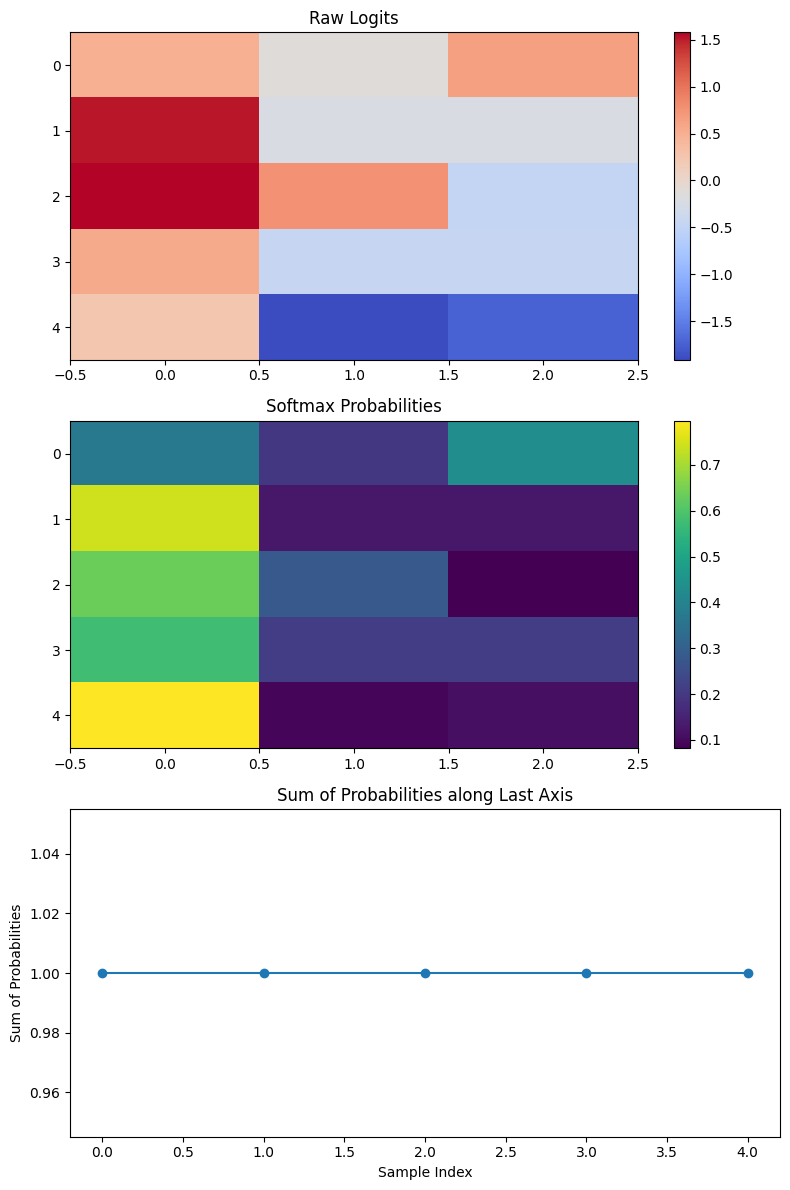

In [7]:
ex_array = np.random.randn(5, 3)
softmax_logits = softmax(ex_array)

fig, ax = plt.subplots(3, 1, figsize=(8, 12))

# Plot raw logits
cax0 = ax[0].imshow(ex_array, cmap='coolwarm', aspect='auto')
ax[0].set_title('Raw Logits')
fig.colorbar(cax0, ax=ax[0])

# Plot softmax probabilities
cax1 = ax[1].imshow(softmax_logits, cmap='viridis', aspect='auto')
ax[1].set_title('Softmax Probabilities')
fig.colorbar(cax1, ax=ax[1])

# Plot sum of probabilities along the last axis
ax[2].plot(softmax_logits.sum(axis=-1), 'o-')
ax[2].set_title('Sum of Probabilities along Last Axis')
ax[2].set_xlabel('Sample Index')
ax[2].set_ylabel('Sum of Probabilities')

plt.tight_layout()
plt.show()

# Loss Function

We will be using **Categorical Cross-Entropy Loss** as our loss function. This is a common loss function to minimize when training multiclass classificaiton problems. The formula is shown below:

$$L(y,\ ŷ) = -∑(y_i * log(ŷ_i))$$

Where $y$ is the truth one-hot encoded array and $ŷ$ is the predicted array with the same shape as the truth array.

# Load in Data

We will load in the MNIST dataset that comes with Google Colab.

In [8]:
train = pd.read_csv("/content/sample_data/mnist_train_small.csv")
test = pd.read_csv("/content/sample_data/mnist_test.csv")

In [9]:
train.head()

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
train.shape, test.shape

((19999, 785), (9999, 785))

In [11]:
unique_labels = np.unique(train.iloc[:, 0].to_numpy())
print(f"labels: {unique_labels}")
print(f"Number of Classes: {len(unique_labels)}")
print(f"Value Counts: \n{train.iloc[:, 0].value_counts()}")

labels: [0 1 2 3 4 5 6 7 8 9]
Number of Classes: 10
Value Counts: 
1    2243
7    2126
6    2038
9    2023
3    2021
2    1989
0    1962
4    1924
8    1912
5    1761
Name: 6, dtype: int64


# Plot Sample

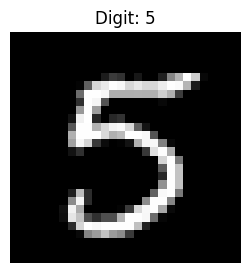

In [12]:
sample_row = train.iloc[0]
label = sample_row[0]
pixel_values = sample_row[1:]

# Reshape pixel values to 2D image (28x28 pixels)
image = np.array(pixel_values).reshape(28, 28)

# Plot the image
plt.figure(figsize=(3, 3))
plt.imshow(image, cmap='gray')
plt.title(f"Digit: {label}")
plt.axis('off')
plt.show()

# Preprocess Data

We will preproces our data in a way that our network can used for training.

### Create One Hot Encoder

Since our labels are currently label encoded, we will create a custom one hot encoder to put them in the format a classification network will expect.

In [13]:
class OneHotEncoder:
    """
    A simple one-hot encoder for converting categorical labels to one-hot vectors.

    This class allows you to perform one-hot encoding on categorical labels. It is
    initialized with a set of fitting data to determine the unique labels and their
    corresponding one-hot indices.

    Args:
        fitting_data: A pandas Series or DataFrame containing the categorical labels
                      used to determine the encoding scheme.

    Attributes:
        values (numpy.ndarray): An array of unique labels from the fitting data.
        matrix_len (int): The length of the encoded one-hot vectors.

    Methods:
        transform(data):
            Encode categorical labels in the input data into one-hot vectors.

        inverse_transform(data):
            Decode one-hot encoded vectors back into categorical labels.

    Usage:
        Create an instance of OneHotEncoder with fitting data, then use the transform
        method to encode categorical labels and the inverse_transform method to decode
        one-hot encoded vectors.
    """
    def __init__(self, fitting_data):
        self.values = np.unique(fitting_data.to_numpy()) # Unique labels
        self.matrix_len = len(self.values) # Length of encoded matrix

    def transform(self, data):
        encoded_data = []
        for label in data.to_numpy():
            arr = np.zeros(self.matrix_len) # Initlalize zeros
            arr[label[0]] = 1 # Set 1 for idx = label
            encoded_data.append(arr) # Append to encoded data
        return np.array(encoded_data)

    def inverse_transform(self, data):
        labels = []
        for encoded_arr in data:
            label = np.where(encoded_arr == 1)[0] # Find index where value is 1
            labels.append(label) # Append to labels
        return np.array(labels)

### Split X and y

We will create a function to split out training inputs from out labels.

In [14]:
def xy_split(dataset):
    """
    Splits data into X and y.
    """
    return dataset.iloc[:, 1:].to_numpy(), dataset.iloc[:, :1]

In [15]:
X_train, y_train = xy_split(train)
X_test, y_test = xy_split(test)

In [16]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(19999, 784) (19999, 1)
(9999, 784) (9999, 1)


### Encode Target Variable

Below we will apply our `OneHotEncoder` to our labels.

In [17]:
ohe = OneHotEncoder(y_train)
y_train_encoded = ohe.transform(y_train)
y_test_encoded = ohe.transform(y_test)

In [18]:
print(X_train.shape, y_train_encoded.shape)
print(X_test.shape, y_test_encoded.shape)

(19999, 784) (19999, 10)
(9999, 784) (9999, 10)


In [19]:
list(zip(y_train_encoded[:3], y_train.to_numpy()[:3]))

[(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]), array([5])),
 (array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]), array([7])),
 (array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]), array([9]))]

In [20]:
assert np.array_equal(ohe.inverse_transform(y_train_encoded), y_train.to_numpy())

### Define Configs

We will define model configurations below.

In [21]:
class Config:
    input_nodes = X_train.shape[1]
    n_classes = len(unique_labels)
    learning_rate = 0.0001
    epochs = 50
    batch_size = 32

### Batch Data


Batching data is a fundamental concept in machine learning and deep learning, especially when training neural networks. It involves dividing a dataset into smaller, manageable groups or batches of data instances. This is more computationally efficient and can lead to faster and more convergence. We will create a class that will batch our data into batches of 32 samples at a time, which is a common value to choose for a batch size.

In [22]:
class BatchGenerator:
    """
    A class for generating mini-batches from a dataset.

    Args:
        X_data (list or array-like): The input data.
        y_data (list or array-like): The corresponding target labels.
        batch_size (int): The size of each mini-batch.

    Attributes:
        X_data (list or array-like): The input data.
        y_data (list or array-like): The corresponding target labels.
        batch_size (int): The size of each mini-batch.
        num_samples (int): The total number of data samples.
        num_batches (int): The total number of mini-batches.
        current_batch (int): The index of the current mini-batch.

    Methods:
        __len__(): Returns the number of mini-batches.
        __iter__(): Returns an iterator for iterating over mini-batches.
        __next__(): Generates the next mini-batch and returns it.

    Usage:
        Initialize an instance of BatchGenerator and use it to iterate over mini-batches
        of your dataset during training.

    Example:
        >>> X_train = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
        >>> y_train = [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
        >>> batch_size = 3
        >>> batch_gen = BatchGenerator(X_train, y_train, batch_size)
        >>> for batch_X, batch_y in batch_gen:
        ...     print(batch_X, batch_y)
    """
    def __init__(self, X_data, y_data, batch_size):
        self.X_data = X_data
        self.y_data = y_data
        self.batch_size = batch_size
        self.num_samples = len(X_data)
        self.num_batches = int(np.ceil(self.num_samples / self.batch_size))
        self.current_batch = 0

    def __len__(self):
        return self.num_batches

    def __iter__(self):
        return self

    def __next__(self):
        start_idx = self.current_batch * self.batch_size
        end_idx = min(start_idx + self.batch_size, self.num_samples)

        if start_idx >= self.num_samples:
            self.current_batch = 0
            raise StopIteration

        batch_X = self.X_data[start_idx:end_idx]
        batch_y = self.y_data[start_idx:end_idx]

        self.current_batch += 1

        return batch_X, batch_y

In [23]:
train_loader = BatchGenerator(X_train, y_train_encoded, Config.batch_size)
eval_loader = BatchGenerator(X_test, y_test_encoded, Config.batch_size)

for batch_X, batch_y in train_loader:
    print(f"Input Shape: {batch_X.shape}, Output Shape: {batch_y.shape}")
    break

Input Shape: (32, 784), Output Shape: (32, 10)


In [24]:
print(f"Train Batches: {len(train_loader)}")
print(f"Eval Batches: {len(eval_loader)}")

Train Batches: 625
Eval Batches: 313


# Build Model

We will now construct the classes we need to make our network

### Define Linear Layer

We will define a linear layer class that will make up our NN architecture.

In [25]:
class Linear:
    """
    A customizable linear layer with various activation functions.

    This class represents a single layer in a neural network, allowing you to specify
    the activation function for that layer. It includes methods for forward and
    backward propagation, as well as functions for common activation functions like
    ReLU, sigmoid, and softmax.

    Args:
        input_nodes (int): The number of input nodes for the layer.
        output_nodes (int): The number of output nodes for the layer.
        activation (str): The activation function to be used ('relu', 'sigmoid', or 'softmax').

    Methods:
        __call__(self, inputs, weights, bias):
            Perform forward propagation for the layer.

        init(self):
            Initialize weights and biases of layer with Xavier Initialization.

        _forward(self, inputs):
            Perform the forward pass for the layer, including activation.

        _backward(self, error, A_before, W_prev, Z_curr):
            Perform backward propagation for the layer.

        _relu(self, x):
            ReLU activation function.

        _softmax(self, x):
            Softmax activation function.

        _sigmoid(self, x):
            Sigmoid activation function.

        _relu_derivative(self, x):
            Derivative of the ReLU activation function.

        _sigmoid_derivative(self, x):
            Derivative of the sigmoid activation function.

    Usage:
        You can create instances of the Linear class to define layers in your neural
        network and customize their activation functions.

    Example:
        >>> layer = Linear(input_nodes=64, output_nodes=32, activation='relu')
        >>> output, Z = layer(inputs)
    """
    def __init__(self, input_nodes, output_nodes, activation):
        self.input_nodes = input_nodes
        self.output_nodes = output_nodes
        self.activation = activation
        self.w = None
        self.b = None
        self.init()

    def __call__(self, inputs):
        """
        Call method implementing single layer forward propagation.
        """
        return self._forward(inputs)

    def init(self):
        """
        Initialize weights and biases of layer with Xavier Initialization.
        """
        input_units = self.input_nodes
        output_units = self.output_nodes
        self.w = np.random.uniform(
            low=-np.sqrt(6.0 / (input_units + output_units)),
            high=np.sqrt(6.0 / (input_units + output_units)),
            size=(input_units, output_units)
        )
        self.b = np.zeros(output_units)

    def _relu(self, x):
        """
        ReLU activation function.
        """
        return np.maximum(x, 0)

    def _softmax(self, x):
        """
        Softmax activation function.
        """
        max_x = np.max(x, axis=-1, keepdims=True)
        exp_x = np.exp(x - max_x)
        return exp_x / np.sum(exp_x, axis=-1, keepdims=True)

    def _relu_derivative(self, x):
        """
        ReLU derivative function.
        """
        return np.where(x > 0, 1, 0)

    def _sigmoid(self, x):
        """
        Sigmoid activation function.
        """
        clipped_x = np.clip(x, -500, 500)  # Clip values to prevent overflow
        return 1 / (1 + np.exp(-clipped_x))

    def _sigmoid_derivative(self, x):
        """
        Derivative of sigmoid.
        """
        return self._sigmoid(x) * (1 - self._sigmoid(x))

    def _forward(self, inputs):
        """
        Single layer forward propagation.
        """
        Z = np.dot(inputs, self.w) + self.b
        if self.activation == 'relu':
            A = self._relu(Z)
        elif self.activation == 'sigmoid':
            A = self._sigmoid(Z)
        elif self.activation == 'softmax':
            A = self._softmax(Z)
        else:
            raise ValueError("Invalid activation function: " + self.activation)

        return A, Z

    def _backward(self,
                  error,
                  A_before,
                  W_prev,
                  Z_curr):
        """
        Single layer backward propagation.

        Args:
            error (np.array): The last calculated error.
            A_before (np.array): The activation from the layer before it during forward propagation.
            W_prev (np.array): The weights array from the next layer during forward propagation.
            Z_curr (np.array): The unactivated output from the current layer.

        Returns:
            dW (np.array): The gradient of the weights with respect to the loss.
            db (np.array): The gradient of the bias with respect to the loss.
            error (np.array): The propagated error for the previous layer.
        """
        if self.activation == 'relu':
            error = np.multiply(
                np.dot(error, W_prev.T), self._relu_derivative(Z_curr)
            )
        elif self.activation == 'sigmoid':
            error = np.multiply(
                np.dot(error, W_prev.T), self._sigmoid_derivative(Z_curr)
            )

        dW = np.dot(A_before.T, error)
        db = np.sum(error, axis=0)

        return dW, db, error

### Build Network

In [26]:
class NeuralNetwork:
    """
    A customizable neural network class for working with linear layers.

    This class allows you to build and train neural networks composed of linear layers.
    It provides methods for adding layers, compiling the network, performing forward and
    backward passes, updating weights using stochastic gradient descent (SGD), and
    calculating the cross-entropy loss and accuracy.

    Args:
        network (list): A list of linear layers to initialize the network (default is empty).

    Attributes:
        network (list): A list of linear layers representing the neural network.
        architecture (dict): A dictionary describing the architecture of the network.
        cache (dict): A dictionary storing weights and biases for each layer.
        _z (list): A list of unactivated logits for each layer.
        _a (list): A list of activated logits for each layer.
        _weight_grads (list): A list of weight gradients for each layer.
        _bias_grads (list): A list of bias gradients for each layer.
        _compiled (bool): Indicates whether the network has been compiled.

    Methods:
        add(self, layer):
            Add a linear layer to the network.

        compile(self):
            Initialize the model architecture and weights.

        forward(self, x, requires_grad=True):
            Perform a forward pass through the network.

        zero_grad(self):
            Reset gradients to zero.

        backward(self, predicted, actual):
            Perform a backward pass through the network and compute gradients.

        step(self, lr):
            Update weights using stochastic gradient descent (SGD).

        cross_entropy(self, y_pred, y_true, epsilon=1e-10):
            Calculate the cross-entropy loss.

    Usage:
        Create an instance of the NeuralNetwork class, add linear layers, compile the
        network, and train it using forward and backward passes.

    Example:
        >>> model = NeuralNetwork()
        >>> model.add(Linear(input_nodes=64, output_nodes=32, activation='relu'))
        >>> model.compile()
        >>> model.zero_grad()
        >>> output = model(input_data)
        >>> loss = model.cross_entropy(output, target_data)
        >>> model.backward(output, target_data)
        >>> model.step(learning_rate)
    """
    def __init__(self, network=None):
        self.network = [] if network is None else network
        self.architecture = {}
        self.cache = {}
        self._z = [] # Unactived logits
        self._a = [] # Activated logits
        self._weight_grads = []
        self._bias_grads = []
        self._compiled = False

        # Zero out gradients
        self.zero_grad()

    def __str__(self):
        """
        Returns model architecture.
        """
        arch = "\n".join([str(item) for item in self.architecture.items()])
        return "\n".join(["-"*100, arch, "-"*100])

    def __call__(self, x, requires_grad=True):
        """
        Call method to implement self.forward().
        """
        return self.forward(x, requires_grad=True)

    def add(self, layer):
        """
        Add layers to the network
        """
        if not self._compiled:
            self.network.append(layer)
        else:
            raise RuntimeError("Cannot add layers after compiling.")

    def compile(self):
        """
        Initialize model architecture.
        """
        self._build_cache()
        for i, layer in enumerate(self.network):
            self.architecture[f"Layer_{i}"] = {
                "Input nodes": layer.input_nodes,
                "Output nodes": layer.output_nodes,
                "Activation": layer.activation
            }
        self._compiled = True

    def _build_cache(self):
        """
        Initialize the model parameters.
        """
        for i, layer in enumerate(self.network):
            self.cache[f'layer_{i}'] = {
                "weights": layer.w,
                "bias": layer.b
            }

    def forward(self, x, requires_grad=True):
        """
        Performs one full forward pass through network.
        """
        if requires_grad:
            self._a.append(x) # Append input to activations

        for layer in self.network:
            A_curr, Z_curr = layer(self._a[-1])

            if requires_grad:
                self._a.append(A_curr) # Add activated output to memory
                self._z.append(Z_curr) # Add unactivated output to memory

        return A_curr

    def zero_grad(self):
        """
        Zeros out gradients.
        """
        self._weight_grads = []
        self._bias_grads = []
        self._a = []
        self._z = []

    def backward(self, predicted, actual):
        """
        Performs one full backward pass through network.
        """
        error = predicted - actual # CCE loss error with respect to preds

        for i in reversed(range(len(self.network))):
            keys = list(self.cache.keys())
            layer = self.network[i]

            # check if it is last layer in network
            if i == len(self.network)-1:
                W_prev = None
            else:
                W_prev = self.cache[keys[i+1]]['weights']

            dW, db, error = layer._backward(
                error=error,
                A_before=self._a[i],
                W_prev=W_prev,
                Z_curr=self._z[i]
            )

            self._weight_grads.insert(0, dW)
            self._bias_grads.insert(0, db)

    def step(self, lr):
        """
        Update weights with SGD.
        """
        for i, key in enumerate(list(self.cache.keys())):
            self.cache[key]['weights'] -= lr * self._weight_grads[i]
            self.cache[key]['bias'] -= lr * self._bias_grads[i]

    def cross_entropy(self, y_pred, y_true, epsilon=1e-10):
        """
        Cross-entropy loss function with epsilon to avoid divide by zero.
        """
        y_pred = np.maximum(y_pred, epsilon)
        return -np.mean(np.sum(y_true * np.log(y_pred), axis=-1))

In [27]:
model = NeuralNetwork([
    Linear(Config.input_nodes, 128, 'sigmoid'),
    Linear(128, 64, 'sigmoid'),
    Linear(64, Config.n_classes, 'softmax')
])

model.compile()

In [28]:
print(model)

----------------------------------------------------------------------------------------------------
('Layer_0', {'Input nodes': 784, 'Output nodes': 128, 'Activation': 'sigmoid'})
('Layer_1', {'Input nodes': 128, 'Output nodes': 64, 'Activation': 'sigmoid'})
('Layer_2', {'Input nodes': 64, 'Output nodes': 10, 'Activation': 'softmax'})
----------------------------------------------------------------------------------------------------


# Train Network

To train our model, we need to create a loop that will loop through our batches and run training procedure on each batch for multiple epochs. I will create a functional class for this so it is easy to read. I will also add functionality for predicting samples after training.

In [29]:
class NetworkClassifier:
    """
    A class for training and evaluating neural network models.

    This class is designed to facilitate the training and evaluation of neural network
    models. It takes a model, training configurations, and data loaders for both
    training and evaluation. The class provides methods for training a model for
    multiple epochs, evaluating its performance, and making predictions.

    Args:
        model: An instance of a neural network model to be trained and evaluated.
        configs: A configuration object containing training hyperparameters.
        train_loader: DataLoader for the training dataset.
        eval_loader: DataLoader for the evaluation dataset.

    Attributes:
        model: The neural network model to be trained.
        configs: Training hyperparameters and configurations.
        train_loader: DataLoader for the training dataset.
        eval_loader: DataLoader for the evaluation dataset.
        history (dict): A dictionary to track training and evaluation metrics.

    Methods:
        _train_single_epoch(self):
            Perform training for a single epoch and compute training metrics.

        evaluate(self):
            Evaluate the model on the evaluation dataset and compute evaluation metrics.

        train(self):
            Train the model for multiple epochs and record training history.

        predict(self, x):
            Make predictions using the trained model.

        get_accuracy(self, y_pred, y_true):
            Calculate the accuracy of the model's predictions.

    Usage:
        Create an instance of NetworkTrainer with a model, configurations, and data loaders,
        then use the train method to train the model. You can also use the evaluate method
        to assess the model's performance and predict method to make predictions.

    Example:
        >>> classifier = NetworkClassifier(model, configs, train_loader, eval_loader)
        >>> history = classifier.train()
        >>> evaluation_loss, evaluation_accuracy = classifier.evaluate()
        >>> predictions = classifier.predict(input_data)
        >>> accuracy = classifier.get_accuracy(predictions, y_true)
    """
    def __init__(self, model, configs, train_loader, eval_loader):
        self.model = model
        self.configs = configs
        self.train_loader = train_loader
        self.eval_loader = eval_loader
        self.history = {} # Track training

    def _train_single_epoch(self):
        running_loss = 0.00
        n_correct = 0
        samples = 0
        batches = len(self.train_loader)
        for idx, (in_data, labels) in enumerate(self.train_loader):

            # zero out grads
            self.model.zero_grad()

            # forward prop
            outputs = self.model(in_data)
            loss = self.model.cross_entropy(outputs, labels)

            # backward prop
            self.model.backward(outputs, labels)
            self.model.step(lr=self.configs.learning_rate)

            # update metrics
            running_loss += loss
            n_correct += np.sum(outputs.argmax(-1) == labels.argmax(-1))
            samples += len(labels)

        epoch_loss = running_loss / batches
        epoch_acc = n_correct / samples
        return epoch_loss, epoch_acc

    def evaluate(self):
        running_loss = 0.00
        n_correct = 0
        samples = 0
        batches = len(self.eval_loader)
        for idx, (in_data, labels) in enumerate(self.eval_loader):

            # forward prop
            outputs = self.model(in_data, requires_grad=False)
            loss = self.model.cross_entropy(outputs, labels)

            # update metrics
            running_loss += loss
            n_correct += np.sum(outputs.argmax(-1) == labels.argmax(-1))
            samples += len(labels)

        epoch_loss = running_loss / batches
        epoch_acc = n_correct / samples
        return epoch_loss, epoch_acc

    def train(self):
        train_accuracies, train_losses = [], []
        eval_accuracies, eval_losses = [], []
        for epoch in range(self.configs.epochs):
            # Train epoch
            train_loss, train_acc = self._train_single_epoch()
            train_losses.append(train_loss)
            train_accuracies.append(train_acc)

            # Eval epoch
            eval_loss, eval_acc = self.evaluate()
            eval_losses.append(eval_loss)
            eval_accuracies.append(eval_acc)

            if ((epoch+1) % 5 == 0) or (epoch == 0):
                print(f"Epoch {epoch+1}/{self.configs.epochs}:")
                print("train loss: {:.4f}, train acc: {:.4f}".format(train_loss, train_acc))
                print("eval loss: {:.4f}, eval acc: {:.4f}".format(eval_loss, eval_acc))
                print()

        self.history['training'] = {
            'accuracy': train_accuracies,
            'loss': train_losses
        }

        self.history['eval'] = {
            'accuracy': eval_accuracies,
            'loss': eval_losses
        }

        return self.history

    def predict(self, x):
        output = self.model(x, requires_grad=False)
        return output.argmax(-1)

    def get_accuracy(self, y_pred, y_true):
        """
        Accuracy function.

        Args:
            y_pred (np.array): A one-dimentional array with predicted labels.
            y_true (np.array): A two-dimentional one-hot encoded array of true values.
        """
        return np.mean(y_pred == y_true.argmax(-1))

In [30]:
classifier = NetworkClassifier(model, Config, train_loader, eval_loader)
history = classifier.train()

Epoch 1/50:
train loss: 2.1420, train acc: 0.3641
eval loss: 1.9578, eval acc: 0.5566

Epoch 5/50:
train loss: 1.1738, train acc: 0.8165
eval loss: 1.0877, eval acc: 0.8329

Epoch 10/50:
train loss: 0.6570, train acc: 0.8779
eval loss: 0.6338, eval acc: 0.8780

Epoch 15/50:
train loss: 0.4695, train acc: 0.9000
eval loss: 0.4733, eval acc: 0.8949

Epoch 20/50:
train loss: 0.3757, train acc: 0.9152
eval loss: 0.3929, eval acc: 0.9055

Epoch 25/50:
train loss: 0.3208, train acc: 0.9231
eval loss: 0.3505, eval acc: 0.9102

Epoch 30/50:
train loss: 0.2827, train acc: 0.9327
eval loss: 0.3225, eval acc: 0.9157

Epoch 35/50:
train loss: 0.2541, train acc: 0.9397
eval loss: 0.2997, eval acc: 0.9193

Epoch 40/50:
train loss: 0.2292, train acc: 0.9442
eval loss: 0.2868, eval acc: 0.9202

Epoch 45/50:
train loss: 0.2116, train acc: 0.9480
eval loss: 0.2734, eval acc: 0.9244

Epoch 50/50:
train loss: 0.1959, train acc: 0.9513
eval loss: 0.2632, eval acc: 0.9257



# Evaluate Training

We will use the history object to plot training and validation progression.

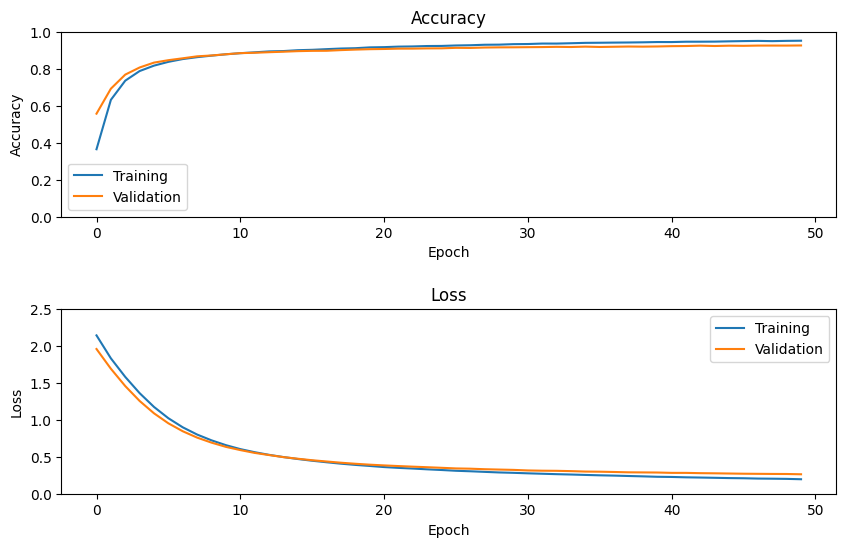

In [31]:
fig, ax = plt.subplots(2, 1, figsize=(10, 6))
fig.subplots_adjust(hspace=0.5)

ax[0].plot(history['training']['accuracy'], label='Training')
ax[0].plot(history['eval']['accuracy'], label='Validation')
ax[0].legend()
ax[0].set_title('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].set_ylim(0, 1)

# Plot training and validation losses
ax[1].plot(history['training']['loss'], label='Training')
ax[1].plot(history['eval']['loss'], label='Validation')
ax[1].set_title('Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].set_ylim(0, 2.5)
ax[1].legend()

plt.show()

# Evaluate on Validation Data

We will use our trainers `.evaluate()` method to evaulate our model on validation data.

In [32]:
val_loss, val_acc = classifier.evaluate()
print("Validation Loss {:.4f}, Validation Accuracy {:.4f}".format(val_loss, val_acc))

Validation Loss 0.2632, Validation Accuracy 0.9257


# Make Prediction

We will take a batch from our validation set and make a prediction using our `.predict()` method and evaluate the accuracy with the `.get_accuracy()` method.

In [33]:
for test_in, test_out in eval_loader:
    break

In [34]:
predictions = classifier.predict(test_in)
accuracy = classifier.get_accuracy(predictions, test_out)
print("This batch had a {:.4} accuracy.".format(accuracy))

This batch had a 0.9688 accuracy.


In [35]:
print(f"y_pred: {predictions} \ny_true: {test_out.argmax(-1)}")

y_pred: [2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3] 
y_true: [2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3]
